In [2]:
import sys
import os
# Add parent directory to Python path
sys.path.append(os.path.abspath(".."))

In [3]:
from PIL import Image
from utils.grad_cam_utils import generate_grad_cam
from torchvision.models import densenet121
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load trained model
model = densenet121(pretrained=False)
model.classifier = nn.Linear(model.classifier.in_features, 3)
model.load_state_dict(torch.load('D:/machine learning/chest-xray-diagnosis/models/chest_xray_densenet.pt', map_location=device))
model = model.to(device)
model.eval()


d:\machine learning\chest-xray-diagnosis\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\machine learning\chest-xray-diagnosis\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [4]:
import os
print(os.listdir('../data/split/test/pneumonia')[:5])


['person1005_bacteria_2936.jpeg', 'person1008_virus_1691.jpeg', 'person100_bacteria_477.jpeg', 'person100_virus_184.jpeg', 'person1011_bacteria_2942.jpeg']


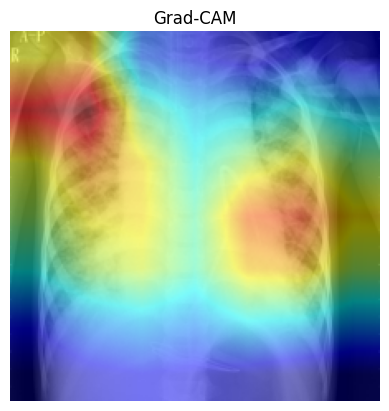

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Select a layer for Grad-CAM
target_layer = model.features[-1]  # usually last conv layer

# Load test image
img_path = '../data/split/test/pneumonia/person1008_virus_1691.jpeg'
image = Image.open(img_path).convert('RGB')

# Generate Grad-CAM
heatmap = generate_grad_cam(model, image, target_layer, device)

# Show it
plt.imshow(heatmap)
plt.title("Grad-CAM")
plt.axis("off")
plt.show()